## Kickstarter Project

In this project, we will explore [data related to crowdfunding](https://www.kaggle.com/kemical/kickstarter-projects). Based on our observations, we will try to determine and implement an ML model which will suit our requirements. The aim of this project is to predict the success or failure of a campaign based on several parameters such as category, deadline for crowdfunding and launch date.

---
### Import libraries and set the style

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

sns.set_style('darkgrid')

---
### Import the dataset

In [3]:
df = pd.read_csv('ks-projects-201612.csv')
df.head()

C:\Users\neera\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


---
### Examine and clean the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              323750 non-null  int64  
 1   name            323746 non-null  object 
 2   category        323745 non-null  object 
 3   main_category   323750 non-null  object 
 4   currency        323750 non-null  object 
 5   deadline        323750 non-null  object 
 6   goal            323750 non-null  object 
 7   launched        323750 non-null  object 
 8   pledged         323750 non-null  object 
 9   state           323750 non-null  object 
 10  backers         323750 non-null  object 
 11  country         323750 non-null  object 
 12  usd pledged     319960 non-null  object 
 13  Unnamed: 13     625 non-null     object 
 14  Unnamed: 14     12 non-null      object 
 15  Unnamed: 15     4 non-null       object 
 16  Unnamed: 16     1 non-null       float64
dtypes: float64

Let's drop the last four columns as they have very few non-null values.

In [5]:
df.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged ', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [6]:
df.columns[-4:]

Index(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], dtype='object')

In [7]:
df.drop(df.columns[-4:], axis=1, inplace=True)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375


In [8]:
df.columns

Index(['ID ', 'name ', 'category ', 'main_category ', 'currency ', 'deadline ',
       'goal ', 'launched ', 'pledged ', 'state ', 'backers ', 'country ',
       'usd pledged '],
      dtype='object')

Observe that the column names have trailing spaces. Let's remove these.

In [9]:
df.columns = df.columns.str.strip()
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged'],
      dtype='object')

In [10]:
df['currency'].value_counts()

USD                   260298
GBP                    27968
CAD                    12197
EUR                    11555
AUD                     6347
SEK                     1300
NZD                     1164
DKK                      841
NOK                      540
CHF                      478
MXN                      214
Publishing               123
SGD                      119
HKD                       97
Film & Video              83
Music                     73
Art                       64
Food                      44
Technology                44
Design                    44
Games                     36
Fashion                   32
Photography               25
Journalism                14
Theater                   13
Comics                    13
Crafts                    10
Dance                      5
 tango and culture         1
 Religion                  1
Rock                       1
Painting                   1
Software                   1
 clothing company          1
 Be active!   

We can see that some rows have incorrectly input data. The value of currency cannot be 'Publishing', 'Film & Video' and so on. Let's remove these rows.

In [11]:
valid_currency_values = ['USD', 'GBP', 'CAD', 'EUR', 'AUD', 'SEK', 'NZD', 'DKK', 'NOK', 'CHF', 'MXN', 'SGD', 'HKD']

In [12]:
df['currency'].isin(valid_currency_values)

0         True
1         True
2         True
3         True
4         True
          ... 
323745    True
323746    True
323747    True
323748    True
323749    True
Name: currency, Length: 323750, dtype: bool

In [13]:
df['currency'].isin(valid_currency_values).value_counts()

True     323118
False       632
Name: currency, dtype: int64

In [14]:
df = df[df['currency'].isin(valid_currency_values)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323118 entries, 0 to 323749
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID             323118 non-null  int64 
 1   name           323114 non-null  object
 2   category       323118 non-null  object
 3   main_category  323118 non-null  object
 4   currency       323118 non-null  object
 5   deadline       323118 non-null  object
 6   goal           323118 non-null  object
 7   launched       323118 non-null  object
 8   pledged        323118 non-null  object
 9   state          323118 non-null  object
 10  backers        323118 non-null  object
 11  country        323118 non-null  object
 12  usd pledged    319328 non-null  object
dtypes: int64(1), object(12)
memory usage: 34.5+ MB


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323118 entries, 0 to 323749
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID             323118 non-null  int64 
 1   name           323114 non-null  object
 2   category       323118 non-null  object
 3   main_category  323118 non-null  object
 4   currency       323118 non-null  object
 5   deadline       323118 non-null  object
 6   goal           323118 non-null  object
 7   launched       323118 non-null  object
 8   pledged        323118 non-null  object
 9   state          323118 non-null  object
 10  backers        323118 non-null  object
 11  country        323118 non-null  object
 12  usd pledged    319328 non-null  object
dtypes: int64(1), object(12)
memory usage: 34.5+ MB


We have successfully removed the incorrect data values (around 630 in number).

The 'goal', 'pledged', 'backers' and 'usd pledged' columns should be integers/floats. Let's do the necessary type conversions. We will also drop the 'ID' and 'name' columns.

In [16]:
df.drop(['ID', 'name'], axis=1, inplace=True)

In [17]:
df[['goal', 'pledged', 'backers', 'usd pledged']] = df[['goal', 'pledged', 'backers', 'usd pledged']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323118 entries, 0 to 323749
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   category       323118 non-null  object 
 1   main_category  323118 non-null  object 
 2   currency       323118 non-null  object 
 3   deadline       323118 non-null  object 
 4   goal           323118 non-null  float64
 5   launched       323118 non-null  object 
 6   pledged        323118 non-null  float64
 7   state          323118 non-null  object 
 8   backers        323118 non-null  int64  
 9   country        323118 non-null  object 
 10  usd pledged    319328 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 29.6+ MB


In [18]:
df.describe()

,goal,pledged,backers,usd pledged
count,3.231180e+05,3.231180e+05,323118.000000,3.193280e+05
mean,4.715252e+04,8.696732e+03,101.634880,7.847678e+03
std,1.139577e+06,8.958641e+04,934.917289,8.468405e+04
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00
25%,2.000000e+03,3.000000e+01,2.000000,2.500000e+01
50%,5.000000e+03,6.100000e+02,12.000000,5.350000e+02
75%,1.500000e+04,3.938000e+03,55.000000,3.575000e+03
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07


Finally, we can see that the 'usd pledged' column has some missing values. Let's impute them with the mean value for 'usd pledged'.

In [19]:
df['usd pledged'].fillna(df['usd pledged'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 323118 entries, 0 to 323749
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   category       323118 non-null  object 
 1   main_category  323118 non-null  object 
 2   currency       323118 non-null  object 
 3   deadline       323118 non-null  object 
 4   goal           323118 non-null  float64
 5   launched       323118 non-null  object 
 6   pledged        323118 non-null  float64
 7   state          323118 non-null  object 
 8   backers        323118 non-null  int64  
 9   country        323118 non-null  object 
 10  usd pledged    323118 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 29.6+ MB


Before doing any feature engineering, let's explore the data to understand what columns are important and how all these columns are related to each other.

---
### Exploratory data analysis - I

In [20]:
df.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0
1,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0
2,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0
3,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0
4,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0


<AxesSubplot:xlabel='state', ylabel='count'>

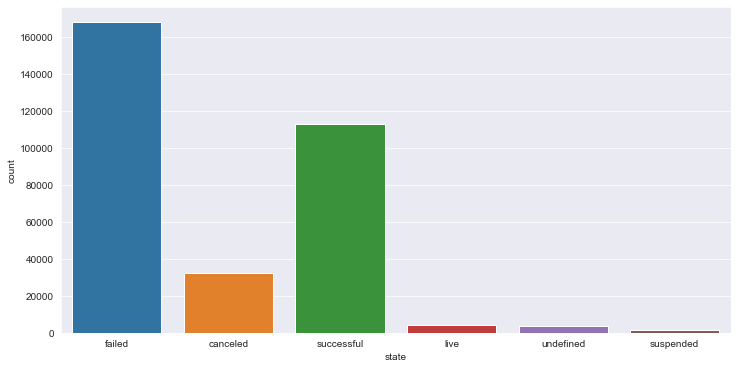

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='state',data=df)

The above plot gives us two important conclusions:
- There are more than two possible states for a given campaign. This means we will need to perform multiclass classification if we consider all the states in our model.
- More campaigns failed than were successful.

In [22]:
df['state'].value_counts()

failed        168221
successful    113081
canceled       32354
live            4428
undefined       3555
suspended       1479
Name: state, dtype: int64

Let's calculate the percentage of values for states other than 'failed' and 'successful'.

In [23]:
sum = 0
for x in range(2,6):
    sum = sum + df['state'].value_counts()[x]

print(sum)

41816


In [24]:
df.count()

category         323118
main_category    323118
currency         323118
deadline         323118
goal             323118
launched         323118
pledged          323118
state            323118
backers          323118
country          323118
usd pledged      323118
dtype: int64

In [25]:
total = df.count()[0]
total

323118

In [26]:
sum/total * 100

12.941402212194925

Around 13% of the campaigns were neither successful nor failures. So, we can safely eliminate these states to make our model easier to implement (convert from multiclass to binary classification). The accuracy won't be affected too much in this case.

In [27]:
required_states = ['failed', 'successful']
df['state'].isin(required_states)

0          True
1          True
2          True
3         False
4          True
          ...  
323745    False
323746     True
323747     True
323748     True
323749     True
Name: state, Length: 323118, dtype: bool

In [28]:
df = df[df['state'].isin(required_states)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281302 entries, 0 to 323749
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   category       281302 non-null  object 
 1   main_category  281302 non-null  object 
 2   currency       281302 non-null  object 
 3   deadline       281302 non-null  object 
 4   goal           281302 non-null  float64
 5   launched       281302 non-null  object 
 6   pledged        281302 non-null  float64
 7   state          281302 non-null  object 
 8   backers        281302 non-null  int64  
 9   country        281302 non-null  object 
 10  usd pledged    281302 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.8+ MB


In [29]:
df['category'].value_counts()

Product Design    14516
Documentary       13346
Music             10872
Shorts            10775
Food               9517
                  ...  
Weaving              59
Residencies          52
Letterpress          34
Chiptune             31
Taxidermy             9
Name: category, Length: 158, dtype: int64

#### Observation 1

The top 5 categories in which campaigns are launched are:
- Product Design
- Documentary
- Music
- Shorts
- Food

Let's create a subset of our dataframe to visualise this data better.

In [30]:
top_categories = ['Product Design', 'Documentary', 'Music', 'Shorts', 'Food']

In [31]:
df['category'].isin(top_categories)

0         False
1         False
2          True
4         False
5          True
          ...  
323743     True
323746    False
323747    False
323748    False
323749    False
Name: category, Length: 281302, dtype: bool

In [32]:
top_categories_df = df[df['category'].isin(top_categories)]
top_categories_df

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
2,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.000000
5,Food,Food,USD,2014-12-21 18:30:44,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.000000
16,Music,Music,USD,2012-08-17 14:11:32,250.0,2012-08-02 14:11:32,250.0,successful,7,US,250.000000
17,Food,Food,USD,2012-06-02 17:24:32,5000.0,2012-05-03 17:24:32,1781.0,failed,40,US,1781.000000
22,Music,Music,USD,2011-01-06 23:16:50,10000.0,2010-12-07 23:16:50,15827.0,successful,147,US,15827.000000
...,...,...,...,...,...,...,...,...,...,...,...
323709,Product Design,Design,USD,2014-03-03 22:00:47,33975.0,2014-02-01 22:00:47,5652.0,failed,13,US,5652.000000
323733,Product Design,Design,CHF,2015-09-04 18:00:47,80000.0,2015-07-06 18:00:47,0.0,failed,0,CH,0.000000
323735,Product Design,Design,USD,2015-12-15 06:59:00,3500.0,2015-11-23 07:33:14,6169.0,successful,120,US,6169.000000
323742,Documentary,Film & Video,NOK,2015-04-28 21:30:33,20000.0,2015-03-29 21:30:33,21500.0,successful,36,NO,2698.974335


<AxesSubplot:xlabel='category', ylabel='Count'>

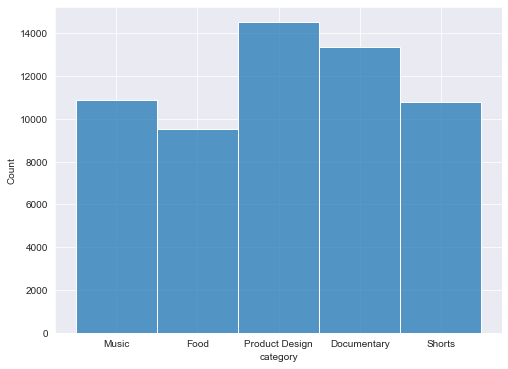

In [33]:
plt.figure(figsize=(8,6))
sns.histplot(data=top_categories_df, x='category')

Let's see if there is any change in the top categories based on the success or failure of a campaign.

<AxesSubplot:xlabel='category', ylabel='Count'>

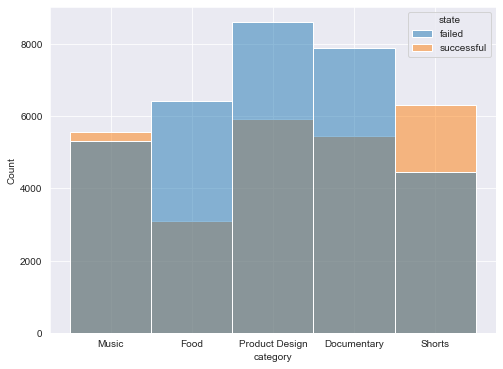

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(data=top_categories_df, x='category', hue='state')

#### Observation 2
We get an interesting observation here. More campaigns were successes than failures for 'Shorts' and 'Music' categories.

Let's now plot histograms for the 'main_category' column and see if we get any more useful insights.

<AxesSubplot:xlabel='main_category', ylabel='Count'>

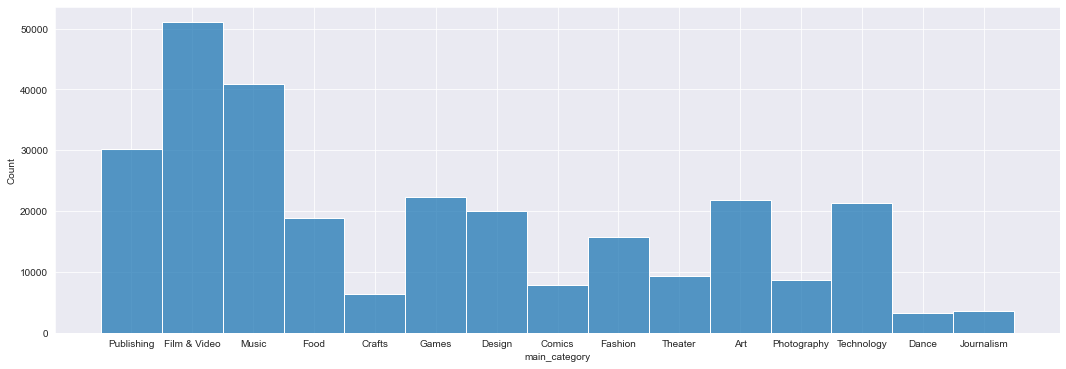

In [35]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x='main_category')

#### Observation 3
'Films and Video' and 'Music' are the dominant main categories for campaign launches. 

<AxesSubplot:xlabel='main_category', ylabel='Count'>

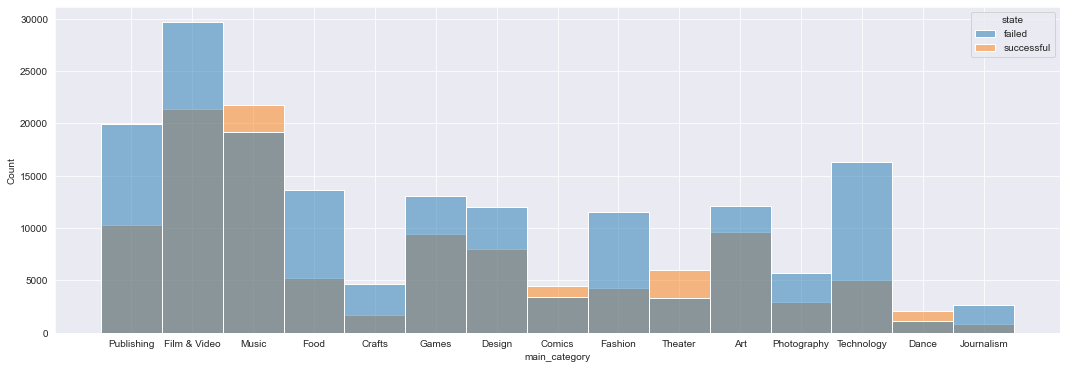

In [36]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x='main_category', hue='state')

#### Observation 4
'Music' and 'Theater' are two categories where there relatively more campaigns were successful as compared to those which failed.

Finally, for visualising categorical variables, let's see how the campaigns performed according to the countries in which they were launched.

<AxesSubplot:xlabel='country', ylabel='Count'>

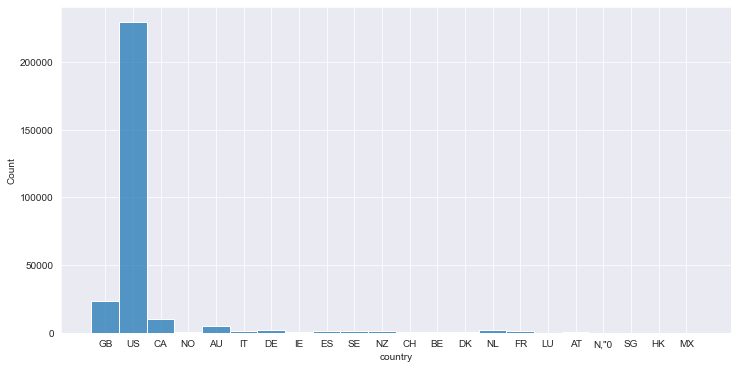

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='country')

#### Observation 5
A very large proportion of the campaigns were launched in the US.

<AxesSubplot:xlabel='country', ylabel='Count'>

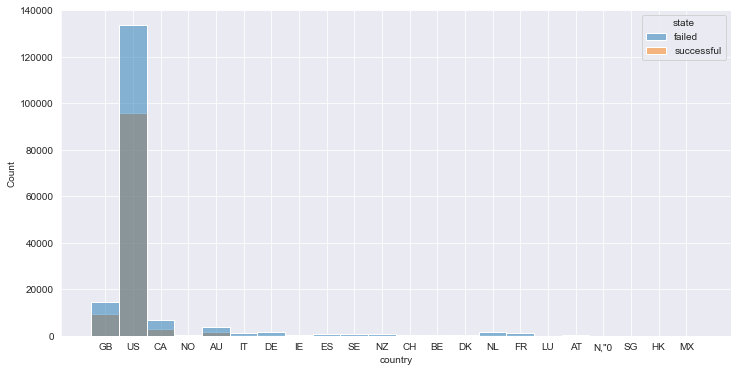

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='country', hue='state')

Let's now see the correlations between the various numeric variables.

In [39]:
df.corr()

,goal,pledged,backers,usd pledged
goal,1.000000,0.007930,0.006090,0.007615
pledged,0.007930,1.000000,0.749335,0.948961
backers,0.006090,0.749335,1.000000,0.716777
usd pledged,0.007615,0.948961,0.716777,1.000000


<AxesSubplot:>

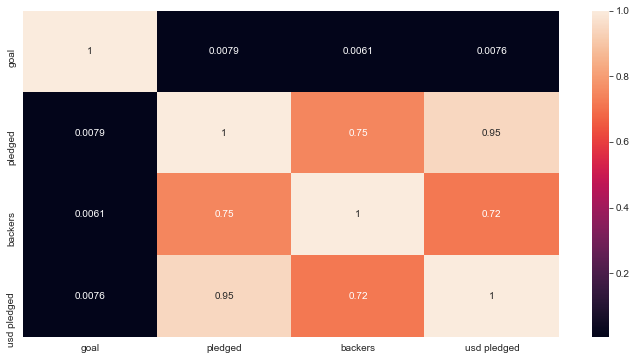

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

#### Observation 6
- There is a very high correlation between the total amount of money pledged and the amount of money pledged in dollars, which is self-explanatory.
- An interestingly high value of correlation is between the amount of money pledged and the number of backers.

---
### Feature engineering 
We will now do some feature engineering on the 'deadline' column to extract the month and year for each timestamp.

In [41]:
df['deadline'][0]

'2015-10-09 11:36:00'

In [42]:
df['deadline'][0].split()[0]

'2015-10-09'

In [43]:
# Extracting the year from the deadline
df['deadline'][0].split()[0].split('-')[0]

'2015'

In [44]:
# Extracting the month from the deadline
df['deadline'][0].split()[0].split('-')[1]

'10'

In [45]:
df['deadline_year'] = df['deadline'].apply(lambda x: x.split()[0].split('-')[0])
df['deadline_year'].head()

0    2015
1    2013
2    2012
4    2016
5    2014
Name: deadline_year, dtype: object

In [46]:
df['deadline_month'] = df['deadline'].apply(lambda x: x.split()[0].split('-')[1])
df['deadline_month'].head()

0    10
1    02
2    04
4    04
5    12
Name: deadline_month, dtype: object

In [47]:
df.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,deadline_year,deadline_month
0,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,2015,10
1,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,2013,02
2,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,2012,04
4,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,2016,04
5,Food,Food,USD,2014-12-21 18:30:44,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.0,2014,12


Let's perform similar steps for extracting the month and year for each timestamp in the 'launched' column.

In [48]:
df['launched_year'] = df['launched'].apply(lambda x: x.split()[0].split('-')[0])
df['launched_year'].head()

0    2015
1    2013
2    2012
4    2016
5    2014
Name: launched_year, dtype: object

In [49]:
df['launched_month'] = df['launched'].apply(lambda x: x.split()[0].split('-')[1])
df['launched_month'].head()

0    08
1    01
2    03
4    02
5    12
Name: launched_month, dtype: object

In [50]:
df.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,deadline_year,deadline_month,launched_year,launched_month
0,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,2015,10,2015,08
1,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,2013,02,2013,01
2,Music,Music,USD,2012-04-16 04:24:11,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,2012,04,2012,03
4,Restaurants,Food,USD,2016-04-01 13:38:27,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,2016,04,2016,02
5,Food,Food,USD,2014-12-21 18:30:44,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.0,2014,12,2014,12


Let's now remove the 'deadline' and 'launched' columns.

In [51]:
df.drop(['deadline', 'launched'], axis=1, inplace=True)
df.head()

,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,deadline_year,deadline_month,launched_year,launched_month
0,Poetry,Publishing,GBP,1000.0,0.0,failed,0,GB,0.0,2015,10,2015,08
1,Narrative Film,Film & Video,USD,45000.0,220.0,failed,3,US,220.0,2013,02,2013,01
2,Music,Music,USD,5000.0,1.0,failed,1,US,1.0,2012,04,2012,03
4,Restaurants,Food,USD,50000.0,52375.0,successful,224,US,52375.0,2016,04,2016,02
5,Food,Food,USD,1000.0,1205.0,successful,16,US,1205.0,2014,12,2014,12


---
### Exploratory data analysis - II
Let's now see if the year or month in which a campaign is launched or has a deadline makes a difference to the success or failure of the campaign. Let's begin with the deadline years and months.

In [52]:
deadline_year_df = df.sort_values('deadline_year', ascending=False)
deadline_year_df.head()

,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,deadline_year,deadline_month,launched_year,launched_month
213717,Publishing,Publishing,USD,10000.0,1.00,failed,1,US,1.000000,2016,04,2016,04
43770,Documentary,Film & Video,USD,8500.0,1.00,failed,1,US,1.000000,2016,05,2016,03
231717,Apparel,Fashion,USD,50000.0,55829.69,successful,515,US,8357.690000,2016,08,2016,06
231715,Music,Music,CAD,15000.0,3249.00,failed,39,CA,2394.130300,2016,01,2015,12
231713,Fiction,Publishing,AUD,15000.0,260.00,failed,3,AU,178.544574,2016,02,2016,01


<AxesSubplot:xlabel='deadline_year', ylabel='Count'>

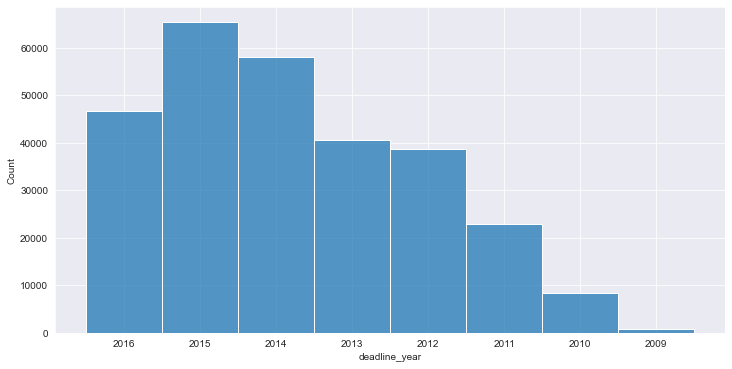

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(data=deadline_year_df, x='deadline_year')

<AxesSubplot:xlabel='deadline_year', ylabel='Count'>

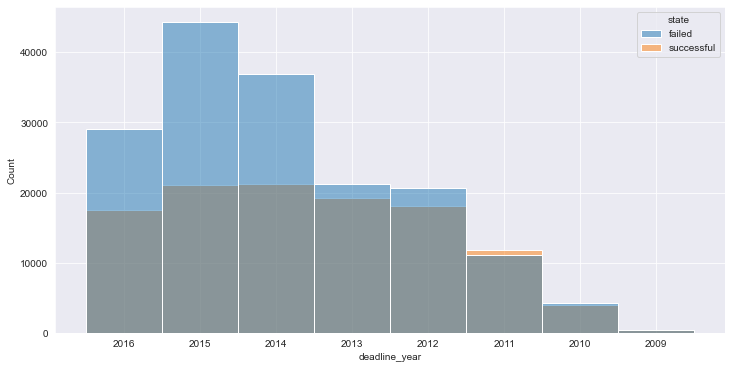

In [54]:
plt.figure(figsize=(12,6))
sns.histplot(data=deadline_year_df, x='deadline_year', hue='state')

#### Observation 7
- The maximum number of campaigns had deadlines in the year 2015.
- Ever since 2012, more campaigns have failed as compared to those that were successful.

In [55]:
deadline_month_df = df.sort_values('deadline_month')
deadline_month_df.head()

,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,deadline_year,deadline_month,launched_year,launched_month
52945,Glass,Crafts,USD,400.0,1271.00,successful,21,US,1271.000000,2016,01,2016,01
264358,Rock,Music,USD,15000.0,38077.18,successful,760,US,38077.180000,2012,01,2011,12
279091,Photography,Photography,USD,2700.0,345.00,failed,11,US,345.000000,2013,01,2012,12
312557,Shorts,Film & Video,GBP,250.0,501.00,successful,10,GB,806.381519,2013,01,2012,12
164595,Food,Food,USD,16088.0,17384.88,successful,189,US,17384.880000,2014,01,2013,12


<AxesSubplot:xlabel='deadline_month', ylabel='Count'>

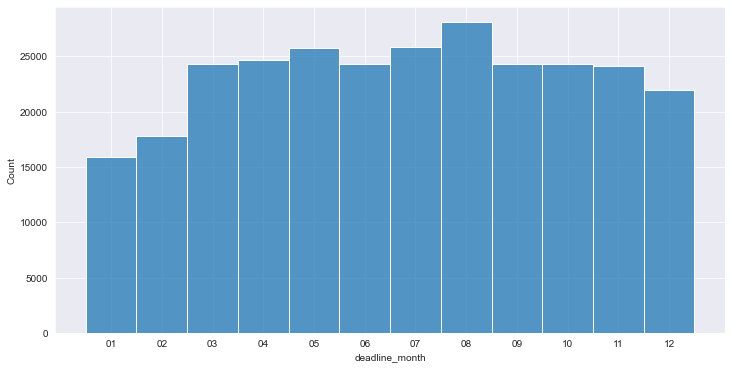

In [56]:
plt.figure(figsize=(12,6))
sns.histplot(data=deadline_month_df, x='deadline_month')

<AxesSubplot:xlabel='deadline_month', ylabel='Count'>

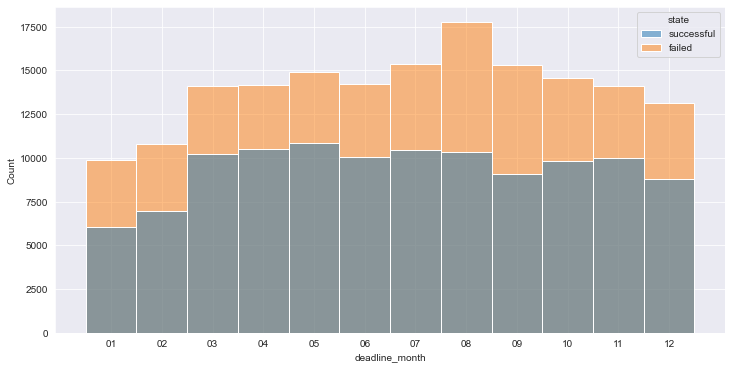

In [57]:
plt.figure(figsize=(12,6))
sns.histplot(data=deadline_month_df, x='deadline_month', hue='state')

#### Observation 8
- Most of the campaigns had a deadline in the month of August.
- The least number of campaigns had deadlines in January.

Let's now continue by exploring the launch months and years for all the campaigns.

In [58]:
launched_year_df = df.sort_values('launched_year', ascending=False)
launched_year_df.head()

,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,deadline_year,deadline_month,launched_year,launched_month
83754,Gadgets,Technology,USD,50000.0,38934.0,failed,542,US,15760.000000,2016,11,2016,10
79846,Product Design,Design,AUD,45000.0,45862.0,successful,706,AU,32860.933382,2016,06,2016,05
147361,Indie Rock,Music,USD,2000.0,2000.0,successful,32,US,2000.000000,2016,05,2016,04
232306,Art,Art,USD,3000.0,715.0,failed,17,US,715.000000,2016,06,2016,05
79750,Classical Music,Music,USD,12000.0,14000.0,successful,159,US,12772.000000,2016,07,2016,06


<AxesSubplot:xlabel='launched_year', ylabel='Count'>

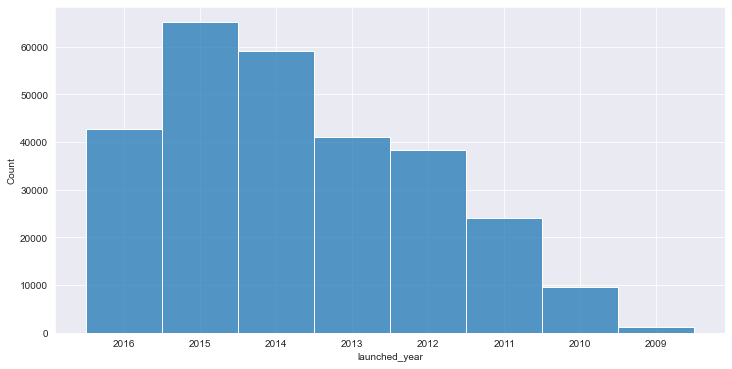

In [59]:
plt.figure(figsize=(12,6))
sns.histplot(data=launched_year_df, x='launched_year')

<AxesSubplot:xlabel='launched_year', ylabel='Count'>

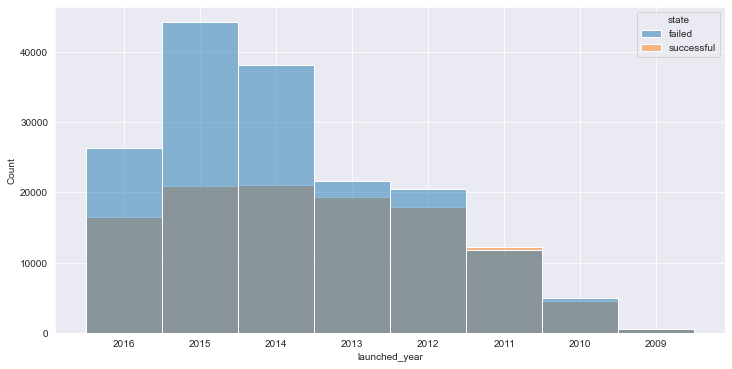

In [60]:
plt.figure(figsize=(12,6))
sns.histplot(data=launched_year_df, x='launched_year', hue='state')

In [61]:
launched_month_df = df.sort_values('launched_month')
launched_month_df.head()

,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,deadline_year,deadline_month,launched_year,launched_month
141906,Music,Music,USD,20000.0,0.00,failed,0,US,0.00,2013,02,2013,01
170346,Digital Art,Art,USD,1500.0,1553.00,successful,20,US,1553.00,2012,02,2012,01
33490,Webseries,Film & Video,USD,300.0,335.00,successful,13,US,335.00,2012,02,2012,01
102674,Illustration,Art,USD,150.0,898.00,successful,58,US,898.00,2016,02,2016,01
152234,Indie Rock,Music,USD,10000.0,12664.61,successful,243,US,12664.61,2012,03,2012,01


<AxesSubplot:xlabel='launched_month', ylabel='Count'>

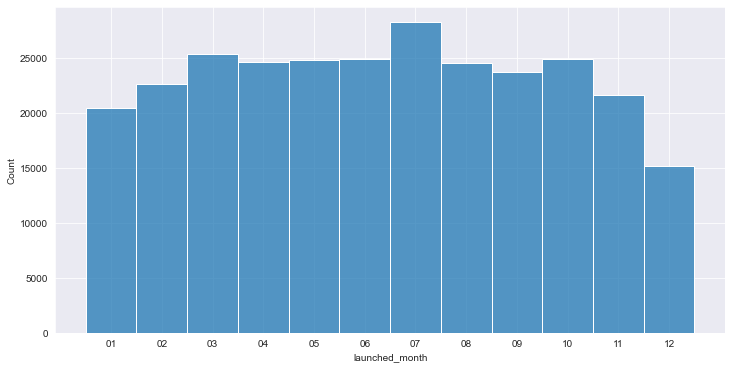

In [62]:
plt.figure(figsize=(12,6))
sns.histplot(data=launched_month_df, x='launched_month')

<AxesSubplot:xlabel='launched_month', ylabel='Count'>

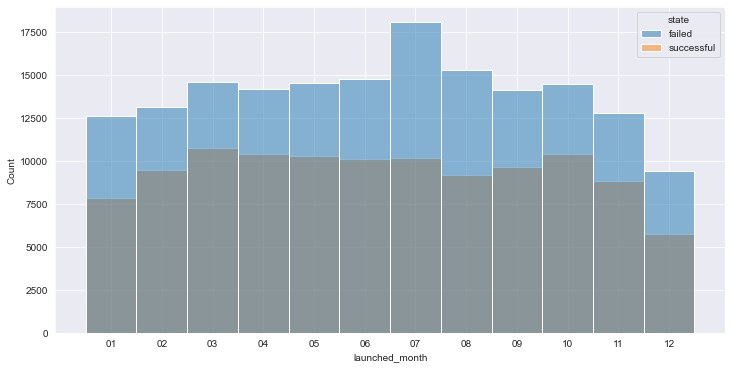

In [63]:
plt.figure(figsize=(12,6))
sns.histplot(data=launched_month_df, x='launched_month', hue='state')

#### Observation 9
- Most of the campaigns were launched in the month of July.
- The least number of campaigns were launched in December. This may probably be because most of the donors live in the US and it's festival time then.

Now let's compare the total amount pledged and the goal with respect to the month and year of a campaign launch.

In [64]:
df.head()

,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,deadline_year,deadline_month,launched_year,launched_month
0,Poetry,Publishing,GBP,1000.0,0.0,failed,0,GB,0.0,2015,10,2015,08
1,Narrative Film,Film & Video,USD,45000.0,220.0,failed,3,US,220.0,2013,02,2013,01
2,Music,Music,USD,5000.0,1.0,failed,1,US,1.0,2012,04,2012,03
4,Restaurants,Food,USD,50000.0,52375.0,successful,224,US,52375.0,2016,04,2016,02
5,Food,Food,USD,1000.0,1205.0,successful,16,US,1205.0,2014,12,2014,12


<AxesSubplot:xlabel='launched_year', ylabel='goal'>

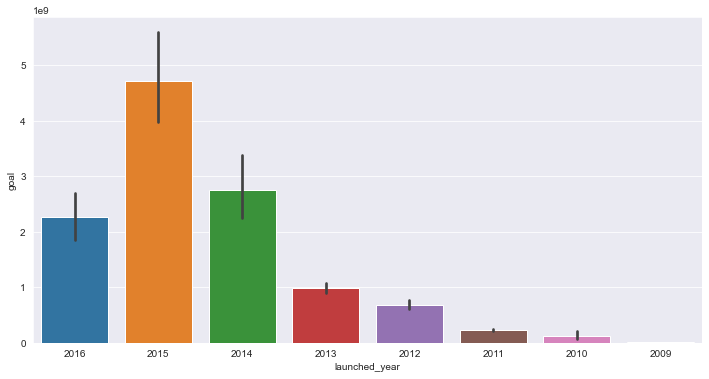

In [65]:
plt.figure(figsize=(12,6))
sns.barplot(data=launched_year_df, x='launched_year', y='goal', estimator=np.sum)

<AxesSubplot:xlabel='launched_year', ylabel='pledged'>

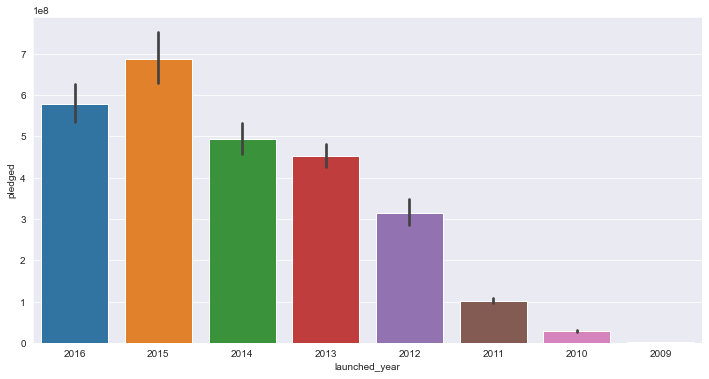

In [66]:
plt.figure(figsize=(12,6))
sns.barplot(data=launched_year_df, x='launched_year', y='pledged', estimator=np.sum)

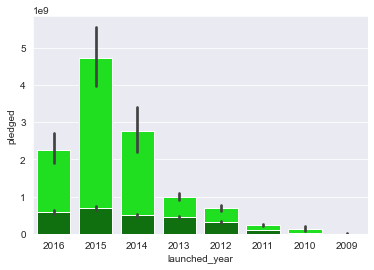

In [67]:
ax = plt.subplots()

ax = sns.barplot(data=launched_year_df, x='launched_year', y='goal', estimator=np.sum, color='lime')
ax = sns.barplot(data=launched_year_df, x='launched_year', y='pledged', estimator=np.sum, color='green')

#### Observation 10
There is a massive difference between the goal and the amount pledged in the year 2015. The cause for such an overestimation should definitely be investigated.

<AxesSubplot:xlabel='launched_month', ylabel='goal'>

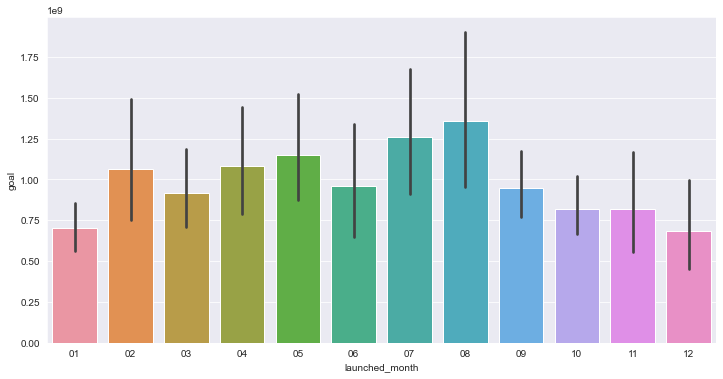

In [68]:
plt.figure(figsize=(12,6))
sns.barplot(data=launched_month_df, x='launched_month', y='goal', estimator=np.sum)

<AxesSubplot:xlabel='launched_month', ylabel='pledged'>

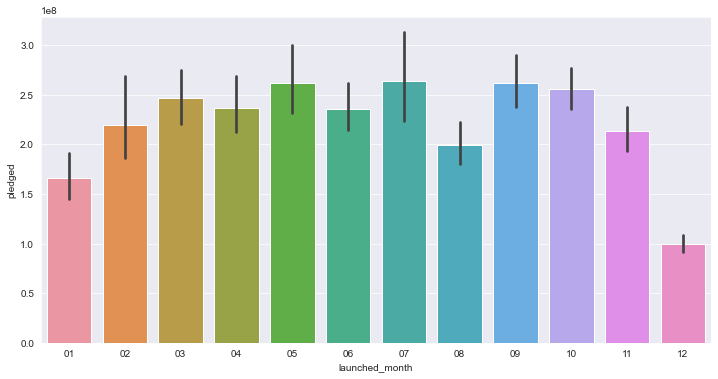

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(data=launched_month_df, x='launched_month', y='pledged', estimator=np.sum)

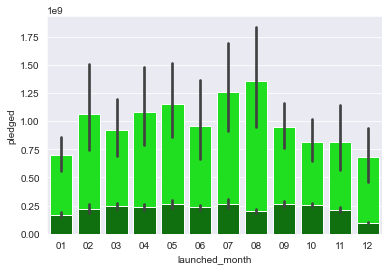

In [70]:
ax = plt.subplots()

ax = sns.barplot(data=launched_month_df, x='launched_month', y='goal', estimator=np.sum, color='lime')
ax = sns.barplot(data=launched_month_df, x='launched_month', y='pledged', estimator=np.sum, color='green')

#### Observation 11
- The amount of money pledged is more or less independent of the month. However, the goals widely vary for each month which should not be the case.
- If we want the amount of money pledged to follow a similar pattern as the goals set for each month, effective measures should be taken to promote the campaign in some of the target months (August, for example).